# Capstone Project - The Battle of Neighborhoods

## Prospects of a Lunch Restaurant in Seoul, Korea.

## 1. Introduction/Business Problem

My friend wants to open a lunch restaurant in Seoul. He asked me for help.

I decided to help him by doing some analysis in the city of Seoul.
I offer two options:
+ Open a restaurant near major office buildings
+ Open fast food restaurants near the transport stations

Target Audiences:
+ People who want to open a restaurant like my friend or maybe a cafe, they can see the pros and cons of the locations.
+ Tourists looking for restaurants in Seoul.
+ Someone wants to understand a piece of data science work.

## 2. Data

I make use of https://en.wikipedia.org/wiki/List_of_districts_of_Seoul page to scrap the table to create a data-frame.

After that, I get coordinates of districts by using Geopy Client and prepare data.

I will first mark the locations of the districts with Foursquare and then give the next analysis.

In [1]:
import sys
import requests
import json

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors


import io
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np

from sklearn.cluster import KMeans

from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="Seoul_explorer", timeout = 10)

**Using BeautifulSoup to find Table**

In [2]:
response_obj = requests.get('https://en.wikipedia.org/wiki/List_of_districts_of_Seoul').text
soup = BeautifulSoup(response_obj,'lxml')
Districts_Seoul_Table = soup.find('table', {'class':'wikitable sortable'})
print(Districts_Seoul_Table.tr.text)


Name
Population
Area
Population density



**Saving the data what I need**

In [3]:
Name = []
Population =[]
Area = []
Popdensity = []

for tr in Districts_Seoul_Table.find_all('tr'):
    i = 0
    for tds in tr.find_all('td'):
        if i == 0:
            Name.append(tds.text[:-1])
        if i == 1:
            Population.append(tds.text[:-1])
        if i == 2:
            Area.append(tds.text[:-1])
        if i == 3:
            Popdensity.append(tds.text[:-1])
        i = i + 1

#A = np.column_stack((Name, Population, Area, Popdensity))
df = pd.DataFrame({"Name": Name, "Population": Population, "Area": Area, "Population_density": Popdensity})
df = df[:-1]
df.to_csv('Seoul.csv', index = False)

In [4]:
import pandas as pd
df = pd.read_csv('Seoul.csv')
df.head()

,Name,Population,Area,Population_density
0,Dobong-gu (도봉구; 道峰區),"355,712",20.70 km²,17184/km²
1,Dongdaemun-gu (동대문구; 東大門區),"376,319",14.21 km²,26483/km²
2,Dongjak-gu (동작구; 銅雀區),"419,261",16.35 km²,25643/km²
3,Eunpyeong-gu (은평구; 恩平區),"503,243",29.70 km²,16944/km²
4,Gangbuk-gu (강북구; 江北區),"338,410",23.60 km²,14339/km²


**Dropping Korean Character in Table**

In [5]:
df[['Name','Korean_language1', 'Korean_language2']] = df['Name'].str.split(' ',expand=True)
df.drop(['Korean_language1'], axis=1, inplace=True)
df.drop(['Korean_language2'], axis=1, inplace=True)
df.head()

,Name,Population,Area,Population_density
0,Dobong-gu,"355,712",20.70 km²,17184/km²
1,Dongdaemun-gu,"376,319",14.21 km²,26483/km²
2,Dongjak-gu,"419,261",16.35 km²,25643/km²
3,Eunpyeong-gu,"503,243",29.70 km²,16944/km²
4,Gangbuk-gu,"338,410",23.60 km²,14339/km²


**Getting coordinates of districts by using Geopy Client and saving**

In [6]:
Latitude = []
Longitude = []

for i in df['Name']:
    location = geolocator.geocode(i)
    Latitude.append(location.latitude)
    Longitude.append(location.longitude)
    
df['Latitude'] = Latitude
df['Longitude'] = Longitude
df.head()

df.to_csv('Seoul_co.csv', index = False)

In [7]:
df = pd.read_csv('Seoul_co.csv')

**Using folium library to add markers to map:**

In [8]:
import folium
address = 'Seoul'

Seloc = geolocator.geocode(address)
Seoul_latitude = Seloc.latitude
Seoul_longitude = Seloc.longitude
print('The geograpical coordinates of Seoul are {}, {}.'.format(Seoul_latitude, Seoul_longitude))

The geograpical coordinates of Seoul are 37.564982549999996, 126.93921080358436.


In [9]:
map_seoul = folium.Map(location=[Seoul_latitude, Seoul_longitude], zoom_start=11)
# add markers to map

for lat, lng, label in zip(df['Latitude'], df['Longitude'], df['Name']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=9,
        popup=label,
        color='magenta',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(map_seoul)  

map_seoul

## 3. Visualization and Data Exploration:

### 3a. Open a restaurant near major office buildings

After finding information on the internet about the places where have major office building, I found 5 locations: Gangnam-gu, Jung-gu, Seocho-gu, Yeongdeungpo-gu, Yongsan-gu.

In [61]:
Districs_list = ['Gangnam-gu', 'Jung-gu', 'Seocho-gu', 'Yeongdeungpo-gu', 'Yongsan-gu']
Seoul_df_selected = df.loc[df['Name'].isin(Districs_list)]
Seoul_df_selected

,Name,Population,Area,Population_density,Latitude,Longitude
6,Gangnam-gu,"583,446",39.50 km²,14771/km²,37.517700,127.04730
13,Jung-gu,"136,227",9.96 km²,13677/km²,37.563656,126.99751
17,Seocho-gu,"454,288",47.00 km²,9666/km²,37.483500,127.03220
23,Yeongdeungpo-gu,"421,436",24.53 km²,17180/km²,37.526200,126.89590
24,Yongsan-gu,"249,914",21.87 km²,11427/km²,37.532300,126.99000


In [12]:
Seoul_center = geolocator.geocode('Yongsan-gu')
map_seoul = folium.Map(location=[Seoul_center.latitude, Seoul_center.longitude], zoom_start=12)
# add markers to map

for lat, lng, label in zip(Seoul_df_selected['Latitude'], Seoul_df_selected['Longitude'], Seoul_df_selected['Name']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=9,
        popup=label,
        color='magenta',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(map_seoul)  

map_seoul

### Foursquare ID

In [13]:
CLIENT_ID = 'DT5JLPN4DLJ5HK3QW1F0GBS3MNHLSKIM4AOD2PJTF3YW2Z0V' # your Foursquare ID
CLIENT_SECRET = 'FVBF0QU5JZUOJZWAADJ5SEJL1NKLPMEVCCBKLYSOFDHFTRN5' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: DT5JLPN4DLJ5HK3QW1F0GBS3MNHLSKIM4AOD2PJTF3YW2Z0V
CLIENT_SECRET:FVBF0QU5JZUOJZWAADJ5SEJL1NKLPMEVCCBKLYSOFDHFTRN5


In [14]:
radius=1000
LIMIT=100

**Category ID of Food**

In [15]:
category = '4d4b7105d754a06374d81259'

In [16]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&categoryId={}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng,
            category,
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                  'Neighbourhood Latitude', 
                  'Neighbourhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [17]:
Seoul_5_district_venues = getNearbyVenues(names=Seoul_df_selected['Name'], latitudes=Seoul_df_selected['Latitude'], longitudes=Seoul_df_selected['Longitude'])

Gangnam-gu
Jung-gu
Seocho-gu
Yeongdeungpo-gu
Yongsan-gu


In [18]:
map_Seoul_5_district = folium.Map(location=[Seoul_center.latitude, Seoul_center.longitude], zoom_start=12, tiles="openstreetmap", 
                            attr="<a href=https://github.com/python-visualization/folium/>Folium</a>")

# set color scheme for the Venues based on the Major Districts
Districts = ['Gangnam-gu', 'Jung-gu', 'Seocho-gu', 'Yeongdeungpo-gu', 'Yongsan-gu']

x = np.arange(len(Districts))

rainbow = ['#00ff00', '#ff00ff','#0000ff','#ffa500' ,'#ff0000']

# add markers to the map
# markers_colors = []
for lat, lon, poi, distr in zip(Seoul_5_district_venues['Venue Latitude'], 
                                  Seoul_5_district_venues['Venue Longitude'], 
                                  Seoul_5_district_venues['Venue Category'], 
                                  Seoul_5_district_venues['Neighbourhood']):
    label = folium.Popup(str(poi) + ' ' + str(distr), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=7,
        popup=label,
        color=rainbow[Districts.index(distr)-1],
        fill=True,
        fill_color=rainbow[Districts.index(distr)-1],
        fill_opacity=0.3).add_to(map_Seoul_5_district)

map_Seoul_5_district

In [19]:
print (Seoul_5_district_venues['Venue Category'].value_counts())

Korean Restaurant                35
BBQ Joint                        19
Noodle House                     12
Bakery                           12
Café                             11
Chinese Restaurant                8
Fried Chicken Joint               5
Pizza Place                       5
Seafood Restaurant                5
Dumpling Restaurant               4
Vietnamese Restaurant             4
Burger Joint                      3
Breakfast Spot                    3
Fast Food Restaurant              3
Mexican Restaurant                3
Udon Restaurant                   2
Indian Restaurant                 2
Thai Restaurant                   2
Restaurant                        2
Italian Restaurant                2
Cantonese Restaurant              2
Sushi Restaurant                  2
Bunsik Restaurant                 2
Modern European Restaurant        2
German Restaurant                 2
Japanese Restaurant               2
Bistro                            1
Dim Sum Restaurant          

In [20]:
Seoul_5d_restaurant_Top10 = Seoul_5_district_venues['Venue Category'].value_counts()[0:10].to_frame(name='frequency')
Seoul_5d_restaurant_Top10 = Seoul_5d_restaurant_Top10.reset_index()

Seoul_5d_restaurant_Top10.rename(index=str, columns={"index": "Venue_Category", "frequency": "Frequency"}, inplace=True)
Seoul_5d_restaurant_Top10

,Venue_Category,Frequency
0,Korean Restaurant,35
1,BBQ Joint,19
2,Noodle House,12
3,Bakery,12
4,Café,11
5,Chinese Restaurant,8
6,Fried Chicken Joint,5
7,Pizza Place,5
8,Seafood Restaurant,5
9,Dumpling Restaurant,4


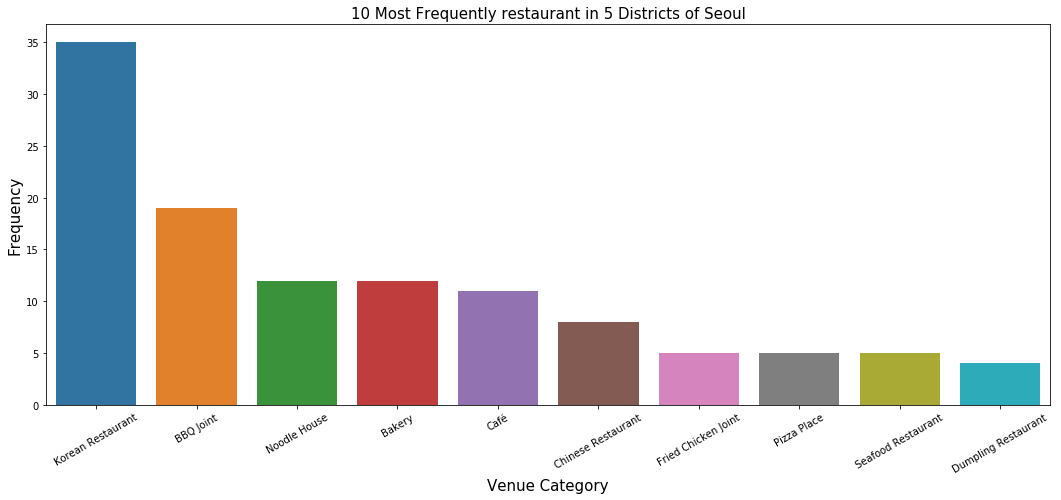

In [21]:
import seaborn as sns

fig = plt.figure(figsize=(18,7))
s=sns.barplot(x="Venue_Category", y="Frequency", data=Seoul_5d_restaurant_Top10)
s.set_xticklabels(s.get_xticklabels(), rotation=30)

plt.title('10 Most Frequently restaurant in 5 Districts of Seoul', fontsize=15)
plt.xlabel("Venue Category", fontsize=15)
plt.ylabel ("Frequency", fontsize=15)
plt.savefig("Most_restaurant.png", dpi=300)
plt.show()

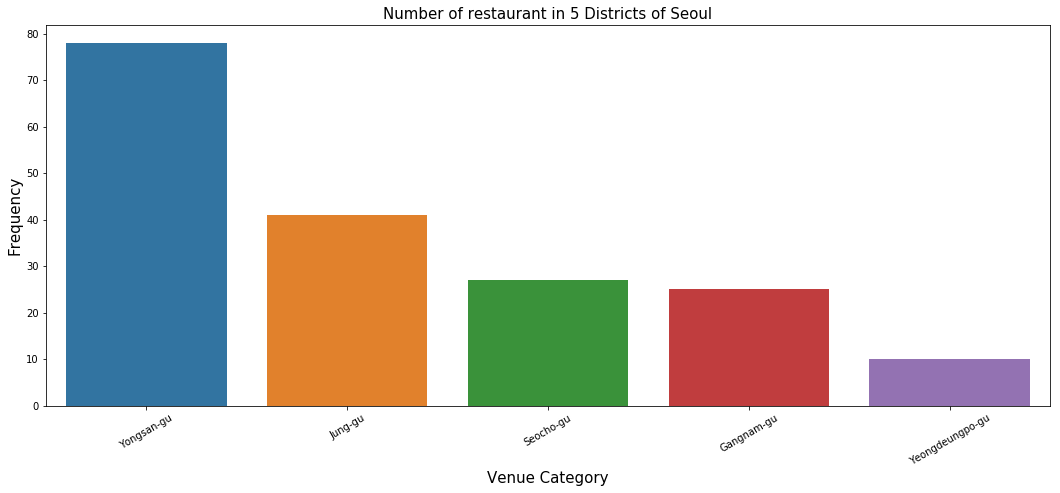

In [111]:
Seoul_5d_number_restaurant = Seoul_5_district_venues['Neighbourhood'].value_counts().to_frame(name='frequency')
Seoul_5d_number_restaurant = Seoul_5d_number_restaurant.reset_index()

Seoul_5d_number_restaurant.rename(index=str, columns={"index": "Neighbourhood", "frequency": "Frequency"}, inplace=True)
Seoul_5d_number_restaurant

fig = plt.figure(figsize=(18,7))
s=sns.barplot(x="Neighbourhood", y='Frequency', data=Seoul_5d_number_restaurant)
s.set_xticklabels(s.get_xticklabels(), rotation=30)

plt.title('Number of restaurant in 5 Districts of Seoul', fontsize=15)
plt.xlabel("Venue Category", fontsize=15)
plt.ylabel ("Frequency", fontsize=15)
plt.savefig("Most_restaurant_in_5_Districts.png", dpi=300)
plt.show()

In [22]:
# one hot encoding
Seoul_onehot = pd.get_dummies(Seoul_5_district_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Seoul_onehot['Neighbourhood'] = Seoul_5_district_venues['Neighbourhood'] 

# move neighborhood column to the first column
fixed_columns = [Seoul_onehot.columns[-1]] + list(Seoul_onehot.columns[:-1])
Seoul_onehot.head()

,African Restaurant,American Restaurant,BBQ Joint,Bagel Shop,Bakery,Bistro,Brazilian Restaurant,Breakfast Spot,Bunsik Restaurant,Burger Joint,...,Sushi Restaurant,Taco Place,Tapas Restaurant,Thai Restaurant,Turkish Restaurant,Udon Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wings Joint,Neighbourhood
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Gangnam-gu
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Gangnam-gu
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Gangnam-gu
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Gangnam-gu
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Gangnam-gu


In [23]:
Seoul_grouped = Seoul_onehot.groupby('Neighbourhood').mean().reset_index()
Seoul_grouped

,Neighbourhood,African Restaurant,American Restaurant,BBQ Joint,Bagel Shop,Bakery,Bistro,Brazilian Restaurant,Breakfast Spot,Bunsik Restaurant,...,Steakhouse,Sushi Restaurant,Taco Place,Tapas Restaurant,Thai Restaurant,Turkish Restaurant,Udon Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wings Joint
0,Gangnam-gu,0.000000,0.000000,0.040000,0.0,0.160000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.08,0.000000,0.000000,0.000000
1,Jung-gu,0.000000,0.000000,0.024390,0.0,0.121951,0.000000,0.000000,0.024390,0.024390,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000
2,Seocho-gu,0.000000,0.000000,0.222222,0.0,0.037037,0.000000,0.000000,0.000000,0.037037,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.037037,0.000000
3,Yeongdeungpo-gu,0.000000,0.000000,0.300000,0.1,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000
4,Yongsan-gu,0.012821,0.012821,0.102564,0.0,0.025641,0.012821,0.012821,0.025641,0.000000,...,0.012821,0.012821,0.012821,0.012821,0.025641,0.012821,0.00,0.012821,0.038462,0.012821


In [24]:
num_top_venues = 5

for hood in Seoul_grouped['Neighbourhood']:
    print("----"+hood+"----")
    temp = Seoul_grouped[Seoul_grouped['Neighbourhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Gangnam-gu----
                        venue  freq
0           Korean Restaurant  0.20
1                      Bakery  0.16
2          Chinese Restaurant  0.12
3                Noodle House  0.12
4  Modern European Restaurant  0.08


----Jung-gu----
                 venue  freq
0    Korean Restaurant  0.34
1         Noodle House  0.15
2               Bakery  0.12
3  Fried Chicken Joint  0.05
4   Italian Restaurant  0.05


----Seocho-gu----
                venue  freq
0           BBQ Joint  0.22
1   Korean Restaurant  0.22
2  Seafood Restaurant  0.11
3  Chinese Restaurant  0.07
4        Burger Joint  0.04


----Yeongdeungpo-gu----
               venue  freq
0          BBQ Joint   0.3
1  Korean Restaurant   0.2
2         Food Court   0.1
3               Café   0.1
4         Bagel Shop   0.1


----Yongsan-gu----
                   venue  freq
0              BBQ Joint  0.10
1      Korean Restaurant  0.10
2                   Café  0.10
3    Dumpling Restaurant  0.05
4  Vietnamese Restaur

In [25]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [26]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighbourhoods_venues_sorted = pd.DataFrame(columns=columns)
neighbourhoods_venues_sorted['Neighbourhood'] = Seoul_grouped['Neighbourhood']

for ind in np.arange(Seoul_grouped.shape[0]):
    neighbourhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Seoul_grouped.iloc[ind, :], num_top_venues)

neighbourhoods_venues_sorted.head()

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Gangnam-gu,Korean Restaurant,Bakery,Noodle House,Chinese Restaurant,Udon Restaurant,Modern European Restaurant,Samgyetang Restaurant,Snack Place,Cantonese Restaurant,Café
1,Jung-gu,Korean Restaurant,Noodle House,Bakery,Italian Restaurant,Fried Chicken Joint,Pizza Place,Donut Shop,Breakfast Spot,Bunsik Restaurant,Indian Restaurant
2,Seocho-gu,BBQ Joint,Korean Restaurant,Seafood Restaurant,Chinese Restaurant,Fried Chicken Joint,Burger Joint,Pizza Place,Restaurant,German Restaurant,Bunsik Restaurant
3,Yeongdeungpo-gu,BBQ Joint,Korean Restaurant,Bagel Shop,Sushi Restaurant,Food Court,Café,Chinese Restaurant,Wings Joint,Dim Sum Restaurant,German Restaurant
4,Yongsan-gu,Korean Restaurant,BBQ Joint,Café,Dumpling Restaurant,Mexican Restaurant,Pizza Place,Vietnamese Restaurant,Thai Restaurant,Burger Joint,Bakery


In [124]:
# set number of clusters
kclusters = 2

Seoul_grouped_clustering = Seoul_grouped.drop('Neighbourhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Seoul_grouped_clustering)

# check cluster labels generated for each row in the dataframe
print ("Check the 5 Cluster labels :",  kmeans.labels_)

Check the 5 Cluster labels : [1 1 0 0 0]


In [125]:
Seoul_grouped_clustering

,African Restaurant,American Restaurant,BBQ Joint,Bagel Shop,Bakery,Bistro,Brazilian Restaurant,Breakfast Spot,Bunsik Restaurant,Burger Joint,...,Steakhouse,Sushi Restaurant,Taco Place,Tapas Restaurant,Thai Restaurant,Turkish Restaurant,Udon Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wings Joint
0,0.000000,0.000000,0.040000,0.0,0.160000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.08,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.024390,0.0,0.121951,0.000000,0.000000,0.024390,0.024390,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.222222,0.0,0.037037,0.000000,0.000000,0.000000,0.037037,0.037037,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.037037,0.000000
3,0.000000,0.000000,0.300000,0.1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000
4,0.012821,0.012821,0.102564,0.0,0.025641,0.012821,0.012821,0.025641,0.000000,0.025641,...,0.012821,0.012821,0.012821,0.012821,0.025641,0.012821,0.00,0.012821,0.038462,0.012821


In [126]:
del Seoul_df_selected['Cluster Label']
print(Seoul_df_selected)
Seoul_df_selected.insert(0, 'Cluster Label', kmeans.labels_)

               Name Population       Area Population_density   Latitude  \
6        Gangnam-gu    583,446  39.50 km²          14771/km²  37.517700   
13          Jung-gu    136,227   9.96 km²          13677/km²  37.563656   
17        Seocho-gu    454,288  47.00 km²           9666/km²  37.483500   
23  Yeongdeungpo-gu    421,436  24.53 km²          17180/km²  37.526200   
24       Yongsan-gu    249,914  21.87 km²          11427/km²  37.532300   

    Longitude  
6   127.04730  
13  126.99751  
17  127.03220  
23  126.89590  
24  126.99000  


In [127]:
# add clustering labels
Seoul_merged = Seoul_df_selected
Seoul_merged = Seoul_merged.rename(columns={"Name": "Neighbourhood"})
Seoul_merged = Seoul_merged.join(neighbourhoods_venues_sorted.set_index('Neighbourhood'), on = 'Neighbourhood')
#neighbourhoods_venues_sorted.head()
Seoul_merged.head()

,Cluster Label,Neighbourhood,Population,Area,Population_density,Latitude,Longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,1,Gangnam-gu,"583,446",39.50 km²,14771/km²,37.517700,127.04730,Korean Restaurant,Bakery,Noodle House,Chinese Restaurant,Udon Restaurant,Modern European Restaurant,Samgyetang Restaurant,Snack Place,Cantonese Restaurant,Café
13,1,Jung-gu,"136,227",9.96 km²,13677/km²,37.563656,126.99751,Korean Restaurant,Noodle House,Bakery,Italian Restaurant,Fried Chicken Joint,Pizza Place,Donut Shop,Breakfast Spot,Bunsik Restaurant,Indian Restaurant
17,0,Seocho-gu,"454,288",47.00 km²,9666/km²,37.483500,127.03220,BBQ Joint,Korean Restaurant,Seafood Restaurant,Chinese Restaurant,Fried Chicken Joint,Burger Joint,Pizza Place,Restaurant,German Restaurant,Bunsik Restaurant
23,0,Yeongdeungpo-gu,"421,436",24.53 km²,17180/km²,37.526200,126.89590,BBQ Joint,Korean Restaurant,Bagel Shop,Sushi Restaurant,Food Court,Café,Chinese Restaurant,Wings Joint,Dim Sum Restaurant,German Restaurant
24,0,Yongsan-gu,"249,914",21.87 km²,11427/km²,37.532300,126.99000,Korean Restaurant,BBQ Joint,Café,Dumpling Restaurant,Mexican Restaurant,Pizza Place,Vietnamese Restaurant,Thai Restaurant,Burger Joint,Bakery


In [128]:
map_restaurants10 = folium.Map(location=[Seoul_center.latitude, Seoul_center.longitude], zoom_start=12, tiles='cartodbpositron', 
                               attr="<a href=https://github.com/python-visualization/folium/>Folium</a>")

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]
#rainbow = ['#00ff00', '#ff00ff','#0000ff','#ffa500' ,'#ff0000']
Districts = ['Nagatacho', 'Nihonbashi', 'Shinjuku', 'Shinagawa', 'Shibuya']

# add markers to the map
for lat, lon, poi, cluster in zip(Seoul_df_selected['Latitude'], 
                                  Seoul_df_selected['Longitude'], 
                                  Seoul_df_selected['Name'], 
                                  Seoul_df_selected['Cluster Label']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=20,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_restaurants10)
       
map_restaurants10

## Explore the 5 Clusters

### Clusters 1

In [130]:
Seoul_merged.loc[Seoul_merged['Cluster Label'] == 0, Seoul_merged.columns[[1] + list(range(7, Seoul_merged.shape[1]))]]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
17,Seocho-gu,BBQ Joint,Korean Restaurant,Seafood Restaurant,Chinese Restaurant,Fried Chicken Joint,Burger Joint,Pizza Place,Restaurant,German Restaurant,Bunsik Restaurant
23,Yeongdeungpo-gu,BBQ Joint,Korean Restaurant,Bagel Shop,Sushi Restaurant,Food Court,Café,Chinese Restaurant,Wings Joint,Dim Sum Restaurant,German Restaurant
24,Yongsan-gu,Korean Restaurant,BBQ Joint,Café,Dumpling Restaurant,Mexican Restaurant,Pizza Place,Vietnamese Restaurant,Thai Restaurant,Burger Joint,Bakery


### Clusters 2

In [131]:
Seoul_merged.loc[Seoul_merged['Cluster Label'] == 1, Seoul_merged.columns[[1] + list(range(7, Seoul_merged.shape[1]))]]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,Gangnam-gu,Korean Restaurant,Bakery,Noodle House,Chinese Restaurant,Udon Restaurant,Modern European Restaurant,Samgyetang Restaurant,Snack Place,Cantonese Restaurant,Café
13,Jung-gu,Korean Restaurant,Noodle House,Bakery,Italian Restaurant,Fried Chicken Joint,Pizza Place,Donut Shop,Breakfast Spot,Bunsik Restaurant,Indian Restaurant


### Clusters 3

In [123]:
Seoul_merged.loc[Seoul_merged['Cluster Label'] == 2, Seoul_merged.columns[[1] + list(range(7, Seoul_merged.shape[1]))]]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
23,Yeongdeungpo-gu,BBQ Joint,Korean Restaurant,Bagel Shop,Sushi Restaurant,Food Court,Café,Chinese Restaurant,Wings Joint,Dim Sum Restaurant,German Restaurant


### Clusters 4

In [67]:
Seoul_merged.loc[Seoul_merged['Cluster Label'] == 3, Seoul_merged.columns[[1] + list(range(7, Seoul_merged.shape[1]))]]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,Gangnam-gu,Korean Restaurant,Bakery,Noodle House,Chinese Restaurant,Modern European Restaurant,Café,Udon Restaurant,BBQ Joint,Snack Place,Samgyetang Restaurant


### Clusters 5

In [68]:
Seoul_merged.loc[Seoul_merged['Cluster Label'] == 4, Seoul_merged.columns[[1] + list(range(7, Seoul_merged.shape[1]))]]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
23,Yeongdeungpo-gu,Café,Korean Restaurant,Chinese Restaurant,BBQ Joint,Seafood Restaurant,Bagel Shop,Japanese Restaurant,Food Court,Sushi Restaurant,Fried Chicken Joint


## 3b. Open fast food restaurants near the transport stations

**Category ID of transport**

In [69]:
category = '4d4b7105d754a06379d81259'
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&categoryId={}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng,
            category,
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                  'Neighbourhood Latitude', 
                  'Neighbourhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

Seoul_transport = getNearbyVenues(names=df['Name'], latitudes=df['Latitude'], longitudes=df['Longitude'])

Dobong-gu
Dongdaemun-gu
Dongjak-gu
Eunpyeong-gu
Gangbuk-gu
Gangdong-gu
Gangnam-gu
Gangseo-gu
Geumcheon-gu
Guro-gu
Gwanak-gu
Gwangjin-gu
Jongno-gu
Jung-gu
Jungnang-gu
Mapo-gu
Nowon-gu
Seocho-gu
Seodaemun-gu
Seongbuk-gu
Seongdong-gu
Songpa-gu
Yangcheon-gu
Yeongdeungpo-gu
Yongsan-gu


In [70]:
print(Seoul_transport['Venue Category'].value_counts())

Bus Stop               112
Hotel                   39
Intersection            31
Metro Station           22
Bus Station             14
Hostel                  12
Rental Car Location      7
Bed & Breakfast          2
Travel & Transport       1
Motel                    1
Duty-free Shop           1
Name: Venue Category, dtype: int64


**In this report, I only focus on Bus Stop and Bus Station**

In [71]:
Seoul_transport = Seoul_transport[Seoul_transport['Venue Category'].str.contains('Bus')]
print(Seoul_transport['Neighbourhood'].value_counts())

Seocho-gu          16
Gwanak-gu          11
Yongsan-gu         10
Dongjak-gu          9
Gangnam-gu          9
Seongbuk-gu         8
Seongdong-gu        7
Songpa-gu           6
Jung-gu             6
Gangdong-gu         6
Gangbuk-gu          6
Gwangjin-gu         5
Dongdaemun-gu       4
Nowon-gu            4
Eunpyeong-gu        4
Jongno-gu           3
Jungnang-gu         2
Seodaemun-gu        2
Mapo-gu             2
Yeongdeungpo-gu     2
Geumcheon-gu        2
Gangseo-gu          1
Yangcheon-gu        1
Name: Neighbourhood, dtype: int64


         Name  Frequency
0   Seocho-gu         16
1   Gwanak-gu         11
2  Yongsan-gu         10
3  Dongjak-gu          9
4  Gangnam-gu          9


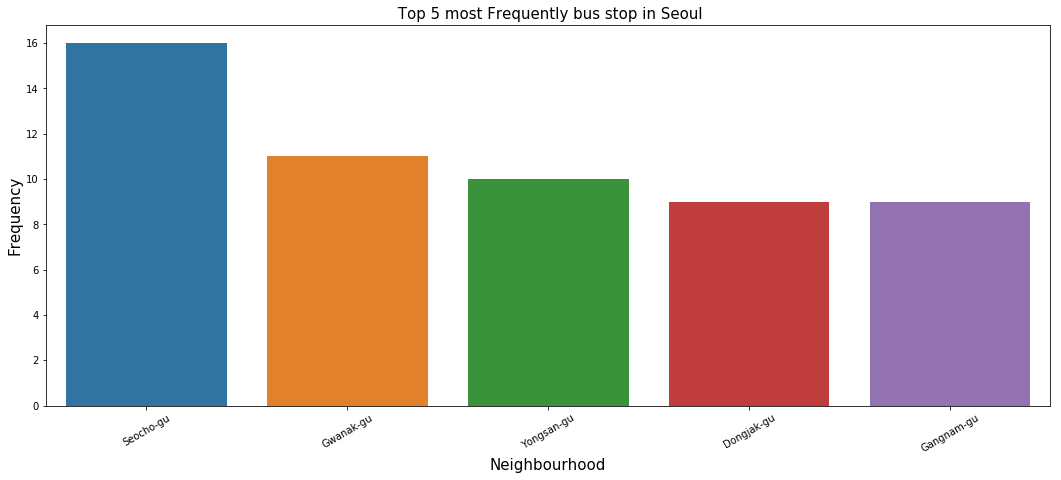

In [92]:
Seoul_transport_Top5 = Seoul_transport['Neighbourhood'].value_counts()[0:5].to_frame(name='frequency')
Seoul_transport_Top5 = Seoul_transport_Top5.reset_index()

Seoul_transport_Top5.rename(index=str, columns={"index": "Name", "frequency": "Frequency"}, inplace=True)

print(Seoul_transport_Top5)
a = Seoul_transport_Top5
fig = plt.figure(figsize=(18,7))
s=sns.barplot(x='Name', y='Frequency', data=Seoul_transport_Top5)
s.set_xticklabels(s.get_xticklabels(), rotation=30)

plt.title(' Top 5 most Frequently bus stop in Seoul', fontsize=15)
plt.xlabel("Neighbourhood", fontsize=15)
plt.ylabel ("Frequency", fontsize=15)
plt.savefig("Most_bus.png", dpi=300)
plt.show()

In [102]:
Districts = ['Seocho-gu', 'Gwanak-gu', 'Yongsan-gu', 'Dongjak-gu', 'Gangnam-gu']
Seoul_transport_Top5 = Seoul_transport.loc[Seoul_transport['Neighbourhood'].isin(Districts)]
Seoul_transport_Top5

,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
8,Dongjak-gu,37.5121,126.9395,"노량진역, 동작구청 (20-844)",37.512949,126.940199,Bus Station
10,Dongjak-gu,37.5121,126.9395,노량진 수산시장 (ID: 20-009) (노량진수산시장.CTS기독교TV),37.513388,126.938460,Bus Stop
11,Dongjak-gu,37.5121,126.9395,동작구청 정문 (ID: 20-240),37.512466,126.940091,Bus Stop
12,Dongjak-gu,37.5121,126.9395,"노량진수산시장,CTS기독교TV (ID: 20-010)",37.513526,126.938839,Bus Stop
13,Dongjak-gu,37.5121,126.9395,노량진역 (ID: 20-114) (노량진역),37.513518,126.941875,Bus Stop
14,Dongjak-gu,37.5121,126.9395,노량진역 (ID: 20-837),37.514073,126.941698,Bus Stop
16,Dongjak-gu,37.5121,126.9395,노량진역 (ID: 20-115),37.513753,126.943545,Bus Stop
17,Dongjak-gu,37.5121,126.9395,노량진역 (ID: 20-011) (노량진역),37.513736,126.943925,Bus Stop
18,Dongjak-gu,37.5121,126.9395,노량진역 (20-012) (노량진역),37.513904,126.944618,Bus Stop
42,Gangnam-gu,37.5177,127.0473,강남구청앞 (ID: 33-206),37.518336,127.047495,Bus Station


In [108]:
map_transport = folium.Map(location=[Seoul_center.latitude, Seoul_center.longitude], zoom_start=12, tiles="openstreetmap", 
                            attr="<a href=https://github.com/python-visualization/folium/>Folium</a>")

# set color scheme for the Venues based on the Major Districts
Districts = ['Seocho-gu', 'Gwanak-gu', 'Yongsan-gu', 'Dongjak-gu', 'Gangnam-gu']

x = np.arange(len(Districts))

rainbow = ['#00ff00', '#ff00ff','#0000ff','#ffa500' ,'#ff0000']

# add markers to the map
# markers_colors = []
for lat, lon, distr in zip(Seoul_transport_Top5['Venue Latitude'], 
                                  Seoul_transport_Top5['Venue Longitude'], 
                                  Seoul_transport_Top5['Neighbourhood']):
    label = folium.Popup(str(distr), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        popup=label,
        color=rainbow[Districts.index(distr)-1],
        fill=True,
        fill_color=rainbow[Districts.index(distr)-1],
        fill_opacity=0.3).add_to(map_transport)

map_transport